# Pair Programming EDA II

En esta lección hemos aprendido qué son los valores nulos y los outliers o valores faltantes. Además hemos aprendido una librería super molona que nos permite hacer una exploración de nuestro dataset muy profunda.

## Hipótesis
Las hipótesis que os planteamos para el conjunto de datos de historico_tickets son:
- Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.
        - La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?
- Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.
        - La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?
- Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.
        - La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?
- Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.
        - La pregunta que contestaremos es: ¿Hay alguna diferencia entre a lo largo del tiempo entre las distintas categorías de solicitudes de tickets que tenemos?

## Objetivos
Usad la librería sidetable para:
1. Explorar los valores nulos.


In [22]:
import pandas as pd 
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datos/historico_tickets_limpio_pandas.csv", index_col= 0)
df.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


In [4]:
df.stb.missing()

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


No hay valores nulos.

2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.


In [8]:
df.stb.freq(['categoría'], thresh=70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


In [6]:
df["categoría"].unique()

array(['Acceso/Login', 'Sistema', 'Software', 'Hardware'], dtype=object)

Los datos de sistema suponen el 40% de los datos, los de Acceso/Login el 30% de los datos y los datos de Software y Hardware unidos, el 30% restante.

3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.


In [12]:
df.stb.freq(["categoría", "tipo"], thresh=70)

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


Las tres categorías con más datos son Sistema, Acceso/Login y Software, todas de tipo solicitud. Las solicitudes de sistema suponen el 30% de los datos totales y sistema junto a acceso/login suponen más del 50% de los datos totales.

4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.


In [17]:
df.stb.freq(["tipo", "semestre"], thresh=60)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


El 38% de los datos son solicitudes en el 2º semestre; el resto de datos superan el umbral del 60%.

5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.


In [18]:
df.stb.freq(["mes", "tipo"], thresh=60)

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


Hasta el 60% de los datos todos los tickets son de tipo solicitud, y nos muestra que los datos acumulados corresponden a 9 meses, cada uno con aproximadamente el 6% de los datos. De momento no podemos decir nada más ni encontrar una relación con el mes. 

6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:
    
    6.1 Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.


In [19]:
df_numerico = df.select_dtypes(include = "int64")

In [20]:
df_numerico.head()

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016
1,1566,10,0,5,2016
2,569,29,3,5,2016
3,320,40,9,5,2016
4,1842,31,0,5,2016


Index(['id_empleado', 'id_agente', 'días_resolución'], dtype='object')

6.2 Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.
    
📌 Nota Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.

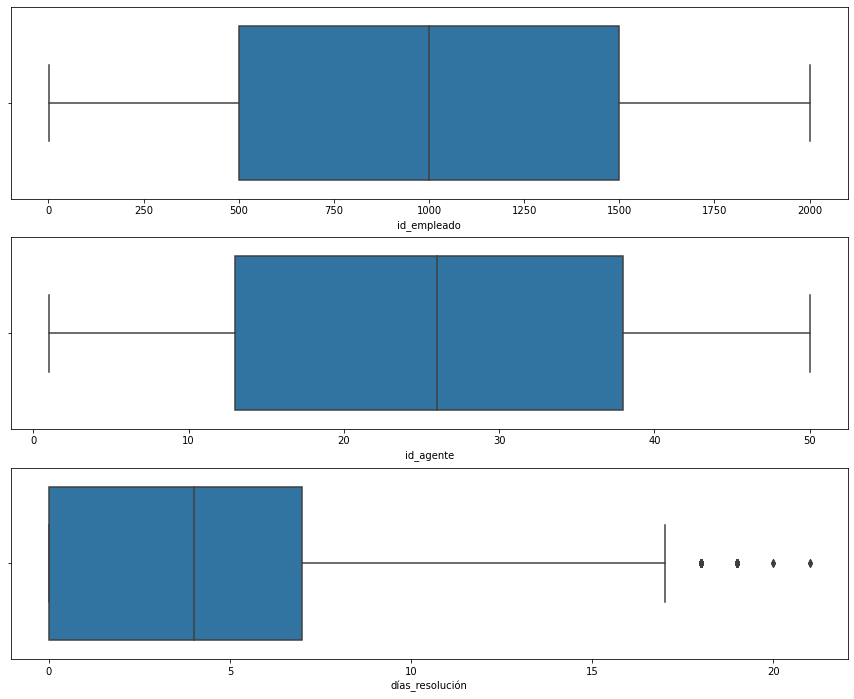

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))

for i in range(len(df_numerico.columns[:3])):
    sns.boxplot(x = df_numerico.columns[i], data = df_numerico, ax=axes[i]); # para trazar una línea de densidad

plt.show()

La única columna en la que el boxplot tiene sentido es dias_resolución, que muestra 4 outliers, los registros en los que los días de resolución han sido superiores a 17 días. 

## Conclusiones

Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).

No hay valores nulos.

Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.

Dependiendo del porcentaje de nulos y el interés que tengamos en la columna podríamos plantearnos eliminar los nulos o reemplazarlos con otro valor, como la media o la moda de los datos no nulos.